In [54]:
import tensorflow as tf
import cv2
from keras.datasets import mnist
from keras.layers import *
from keras.layers import LeakyReLU
from keras.models import Sequential, Model
from keras.optimizers import Adam
import numpy as np
from matplotlib import pyplot as plt
import keras

In [55]:
(xtrain, ytrain), (xtest, ytest) = mnist.load_data()

In [56]:
xtrain = (xtrain - 127.5)/127.5

In [57]:
totalepochs = 50
batchsize = 256
halfbatch = 128
numofbatch = int(xtrain.shape[0]/batchsize)
noisedim = 100
adam = Adam(learning_rate = 2e-4, beta_1 = 0.5)

In [58]:
generator = Sequential()
generator.add(Dense(units = 7 * 7 * 128, input_shape = (noisedim,)))
generator.add(Reshape((7,7,128)))
generator.add(LeakyReLU(alpha=0.2))
generator.add(BatchNormalization())
generator.add(Conv2DTranspose(64, (3,3), strides=(2,2), padding= "same"))
generator.add(LeakyReLU(0.2))
generator.add(BatchNormalization())
generator.add(Conv2DTranspose(1, (3,3), strides=(2,2), padding= "same", activation="tanh"))
generator.compile(loss = keras.losses.binary_crossentropy, optimizer = adam)
generator.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 6272)              633472    
                                                                 
 reshape_5 (Reshape)         (None, 7, 7, 128)         0         
                                                                 
 leaky_re_lu_25 (LeakyReLU)  (None, 7, 7, 128)         0         
                                                                 
 batch_normalization_10 (Bat  (None, 7, 7, 128)        512       
 chNormalization)                                                
                                                                 
 conv2d_transpose_10 (Conv2D  (None, 14, 14, 64)       73792     
 Transpose)                                                      
                                                                 
 leaky_re_lu_26 (LeakyReLU)  (None, 14, 14, 64)      

In [59]:
discriminator = Sequential()
discriminator.add(Conv2D(64, kernel_size=(3,3), strides=(2,2), padding="same", input_shape= (28,28,1)))
discriminator.add(LeakyReLU(alpha=0.2))
discriminator.add(Conv2D(128, kernel_size=(3,3), strides=(2,2), padding="same"))
discriminator.add(LeakyReLU(alpha=0.2))
discriminator.add(Flatten())
discriminator.add(Dense(100))
discriminator.add(LeakyReLU(alpha=0.2))
discriminator.add(Dense(1, activation="sigmoid"))
discriminator.compile(loss = keras.losses.binary_crossentropy, optimizer = adam)
discriminator.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 14, 14, 64)        640       
                                                                 
 leaky_re_lu_27 (LeakyReLU)  (None, 14, 14, 64)        0         
                                                                 
 conv2d_11 (Conv2D)          (None, 7, 7, 128)         73856     
                                                                 
 leaky_re_lu_28 (LeakyReLU)  (None, 7, 7, 128)         0         
                                                                 
 flatten_5 (Flatten)         (None, 6272)              0         
                                                                 
 dense_16 (Dense)            (None, 100)               627300    
                                                                 
 leaky_re_lu_29 (LeakyReLU)  (None, 100)             

In [60]:
discriminator.trainable = False
ganinput = Input(shape=noisedim, )
genimg = generator(ganinput)
ganoutput = discriminator(genimg)

In [61]:
model = Model(ganinput, ganoutput)
model.compile(loss=keras.losses.binary_crossentropy, optimizer= adam)
model.summary()

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 100)]             0         
                                                                 
 sequential_10 (Sequential)  (None, 28, 28, 1)         708609    
                                                                 
 sequential_11 (Sequential)  (None, 1)                 701897    
                                                                 
Total params: 1,410,506
Trainable params: 708,225
Non-trainable params: 702,281
_________________________________________________________________


In [62]:
xtrain = xtrain.reshape(-1, 28, 28, 1)
xtrain.shape

(60000, 28, 28, 1)

In [63]:
def displayimages(samples = 25):
    noise = np.random.normal(0,1,size=(samples, noisedim))
    generatedimage = generator.predict(noise)
    plt.figure(figsize=(10, 10))
    for i in range(samples):
        plt.subplot(5,5,i+1)
        plt.imshow(generatedimage[i].reshape(28,28), cmap= "binary")
        plt.axis("off")

4/4 [==============================] - 0s 14ms/step
epoch1, discriminator losses0.00298585354262947, generator losses0.002669374148050944
4/4 [==============================] - 0s 15ms/step
epoch1, discriminator losses0.0055045880313612456, generator losses0.005111468398672903
4/4 [==============================] - 0s 14ms/step
epoch1, discriminator losses0.007796821940658439, generator losses0.007388566294287005
4/4 [==============================] - 0s 14ms/step
epoch1, discriminator losses0.009994901270947905, generator losses0.009596165174093002
4/4 [==============================] - 0s 13ms/step
epoch1, discriminator losses0.01216547993513254, generator losses0.011878590298514081
4/4 [==============================] - 0s 13ms/step
epoch1, discriminator losses0.014316296539245507, generator losses0.014271750918820374
4/4 [==============================] - 0s 13ms/step
epoch1, discriminator losses0.016441789001990587, generator losses0.016830791520257283
4/4 [=======================

<ipython-input-63-daa9d027e259>:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(10, 10))


4/4 [==============================] - 0s 15ms/step
epoch10, discriminator losses0.062276646240144715, generator losses0.09533450975377336
4/4 [==============================] - 0s 12ms/step
epoch10, discriminator losses0.06518977371036497, generator losses0.09967941020289038
4/4 [==============================] - 0s 11ms/step
epoch10, discriminator losses0.06799278440129043, generator losses0.10403938298551445
4/4 [==============================] - 0s 12ms/step
epoch10, discriminator losses0.07089778946505652, generator losses0.10851989469976507
4/4 [==============================] - 0s 12ms/step
epoch10, discriminator losses0.07374468967955336, generator losses0.11284669724285093
4/4 [==============================] - 0s 11ms/step
epoch10, discriminator losses0.07660287873357789, generator losses0.11708006874108925
4/4 [==============================] - 0s 12ms/step
epoch10, discriminator losses0.07938403859097734, generator losses0.12135549106149592
4/4 [============================

KeyboardInterrupt: 

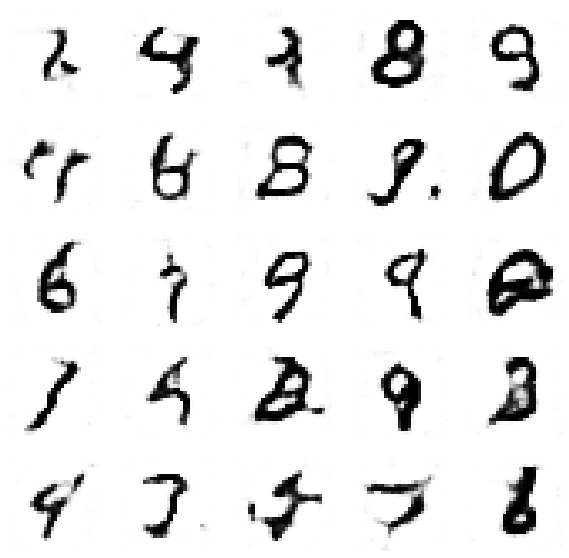

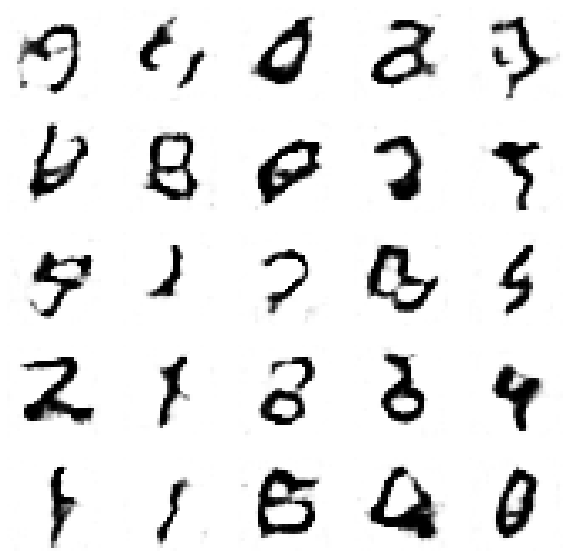

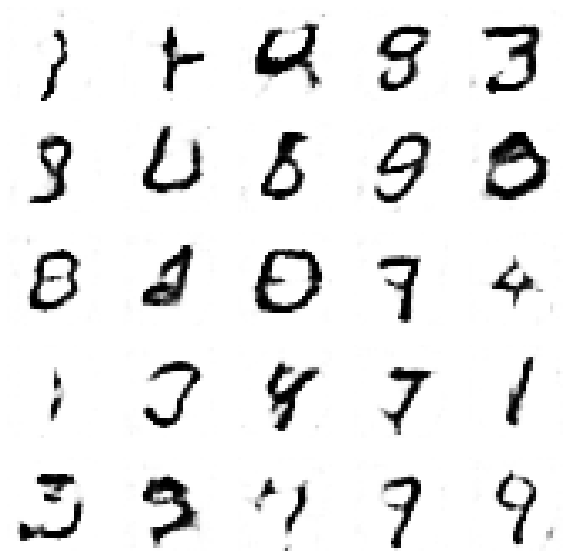

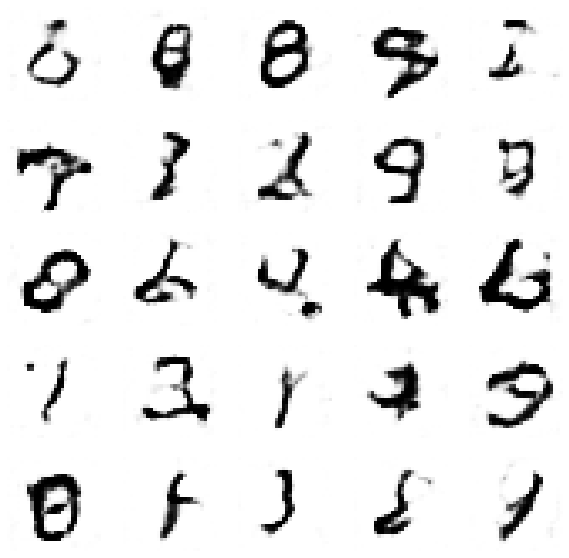

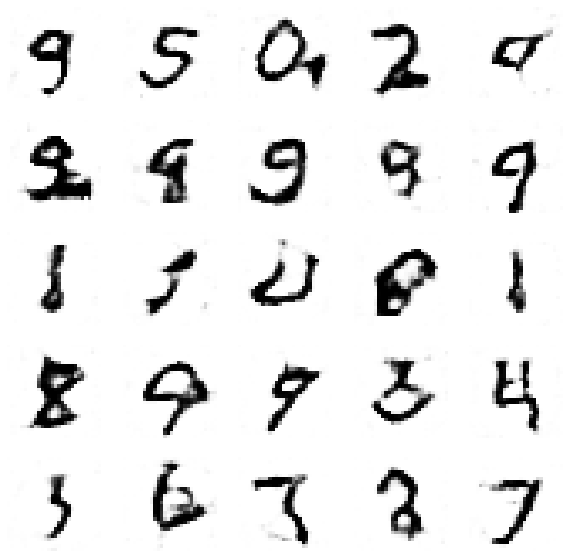

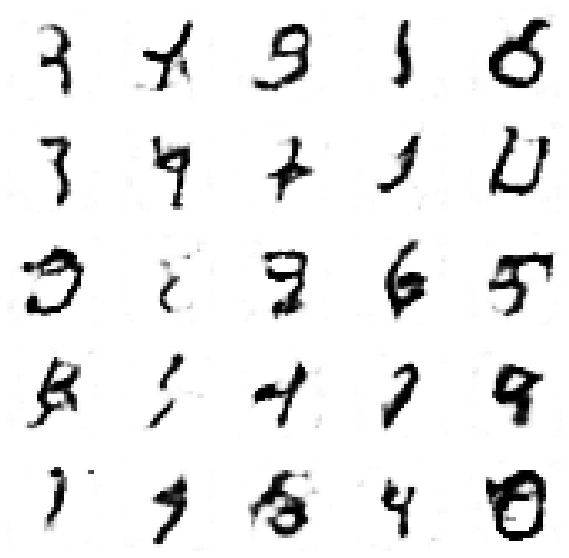

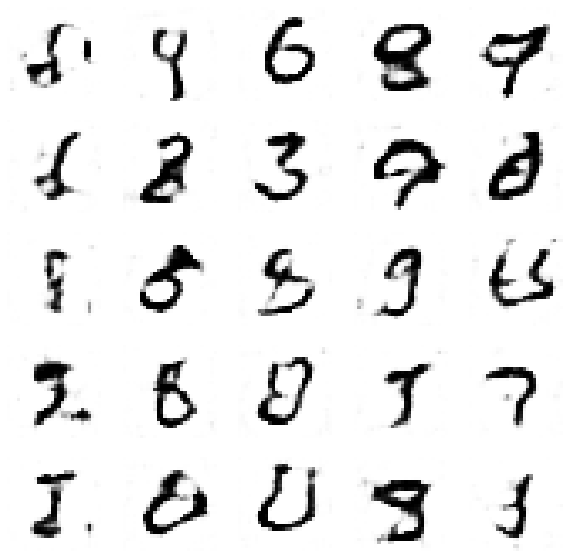

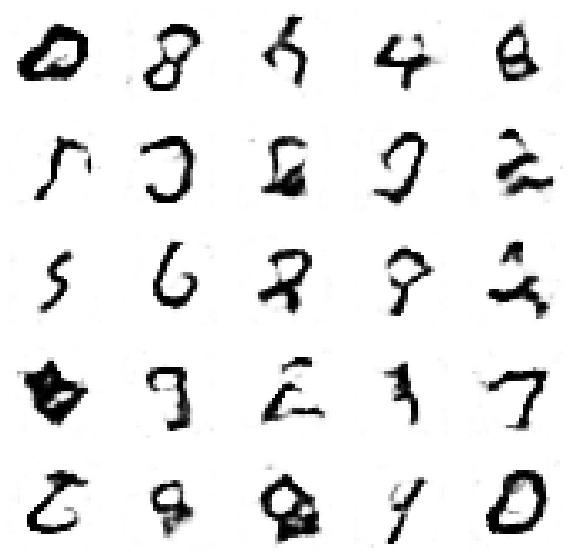

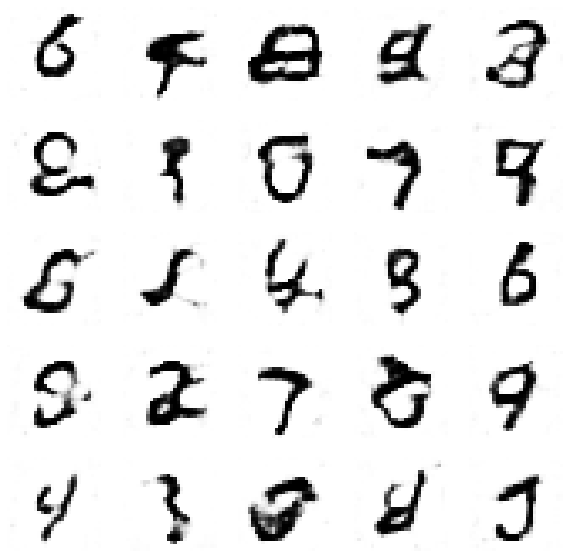

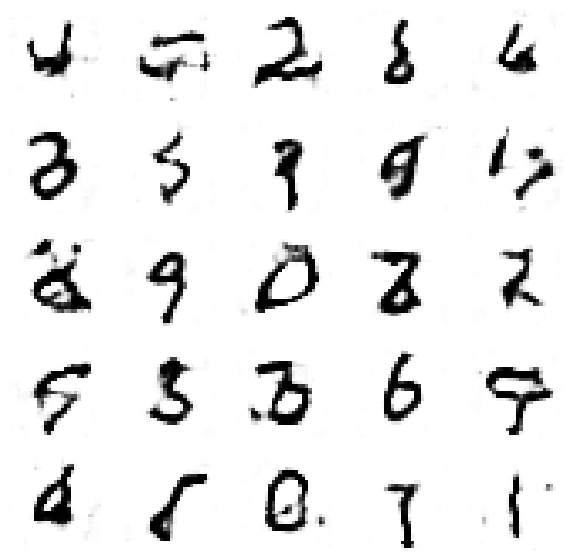

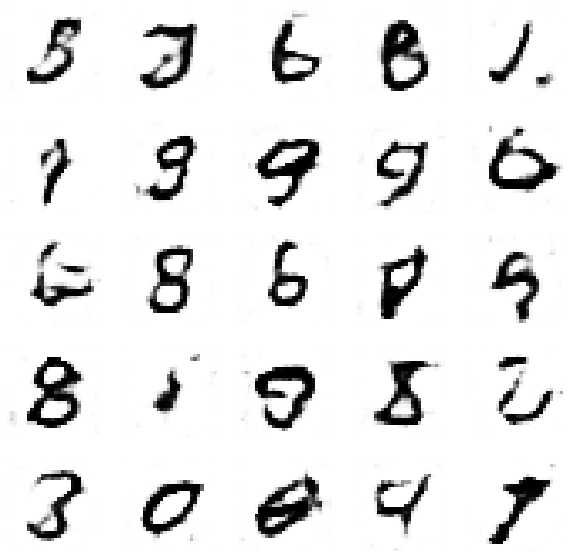

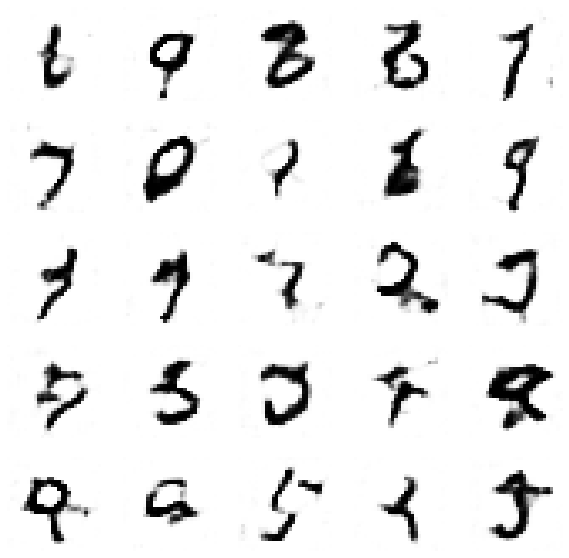

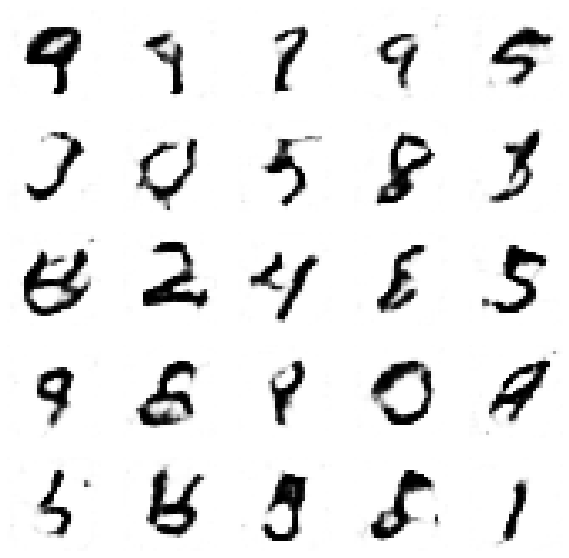

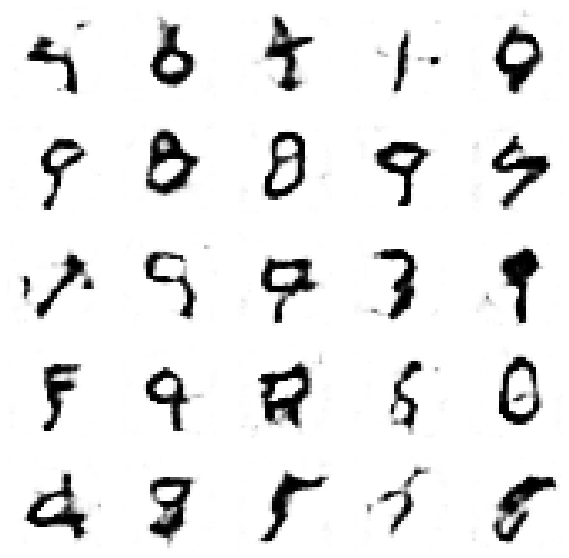

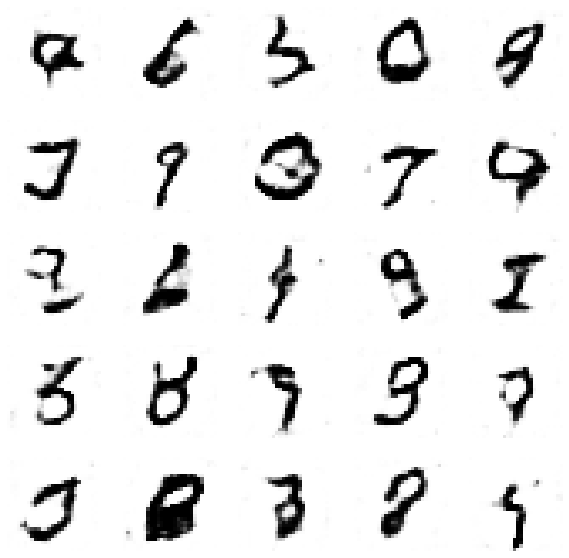

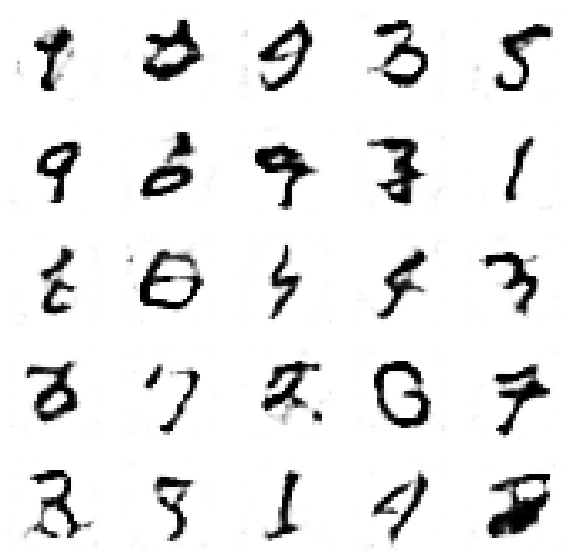

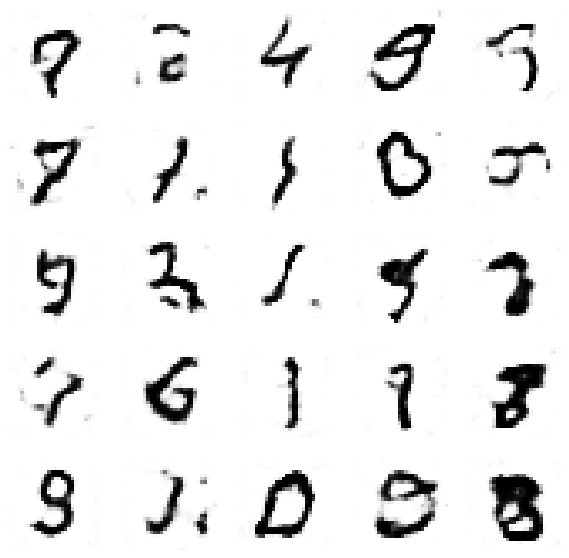

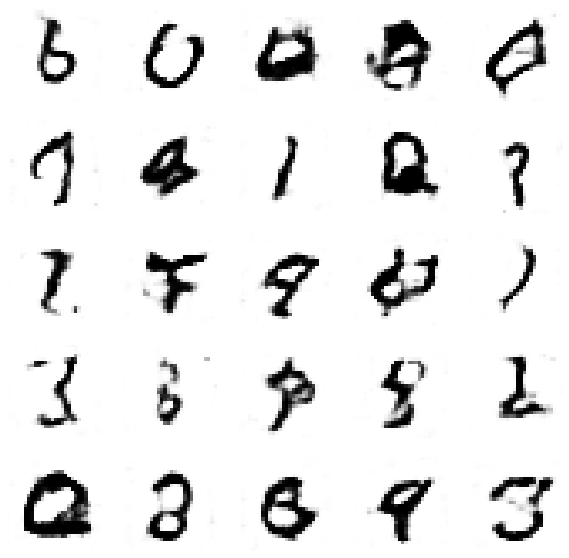

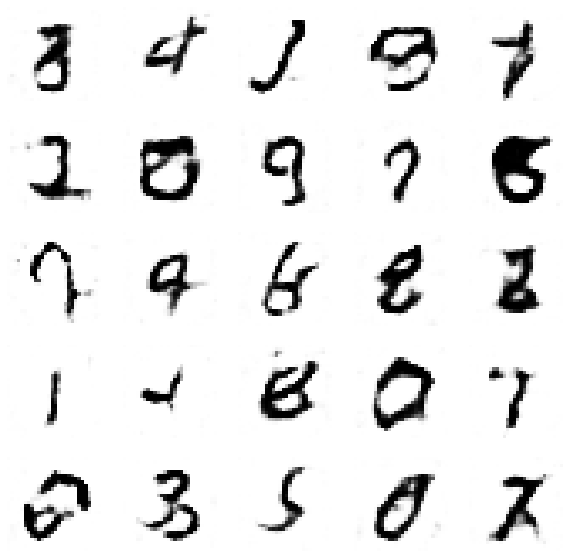

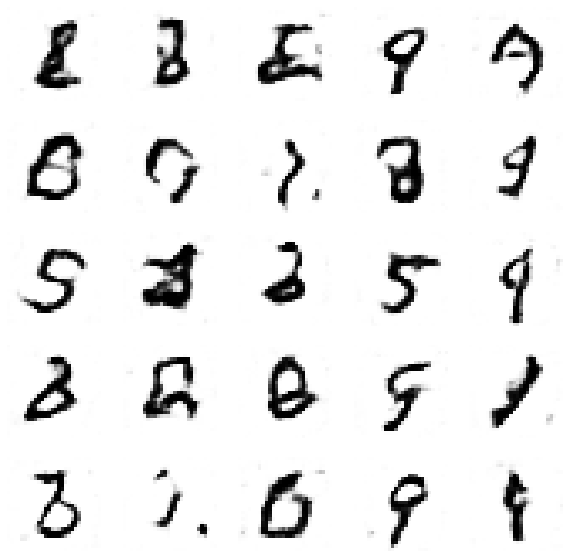

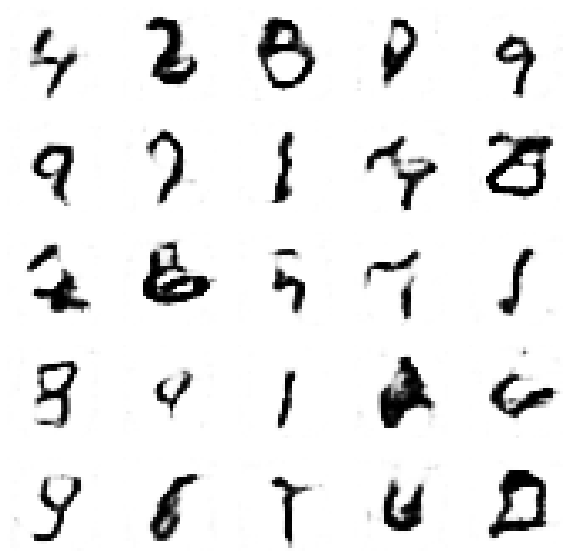

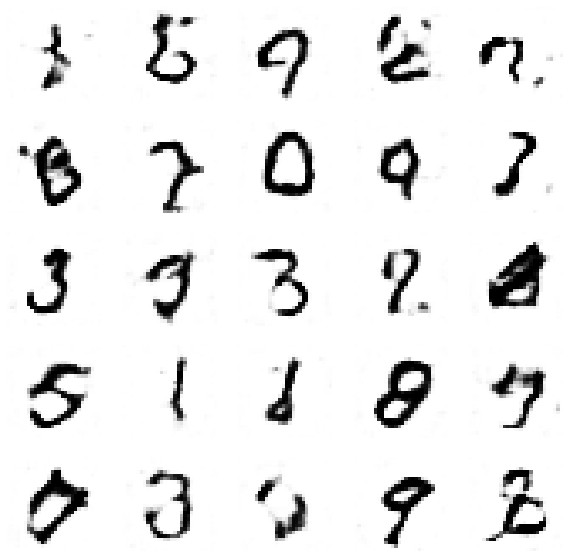

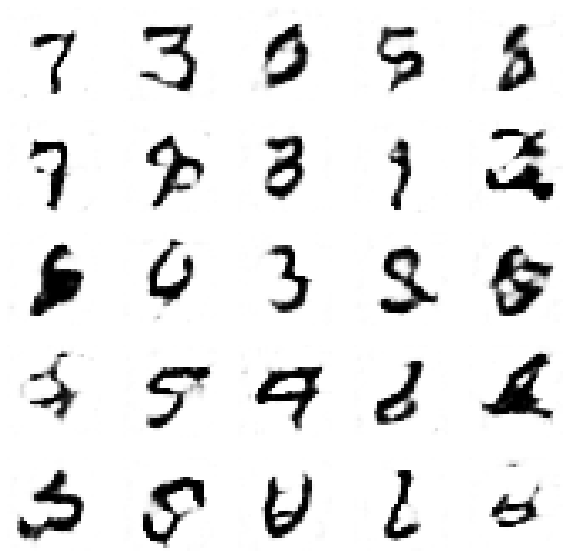

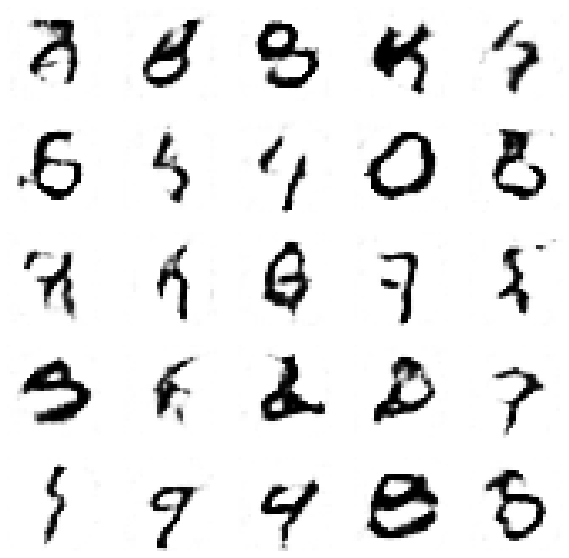

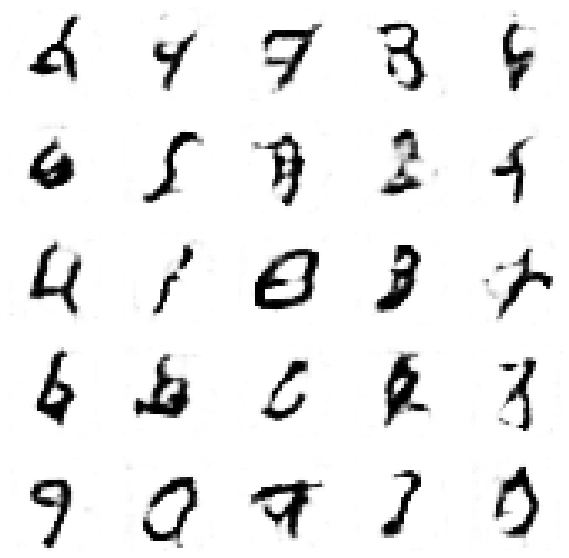

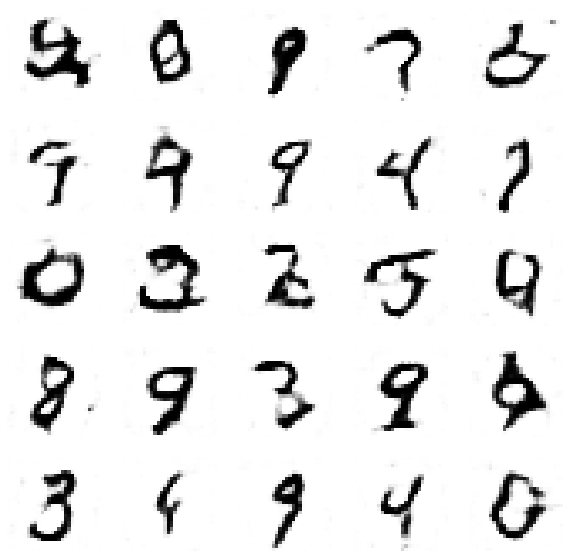

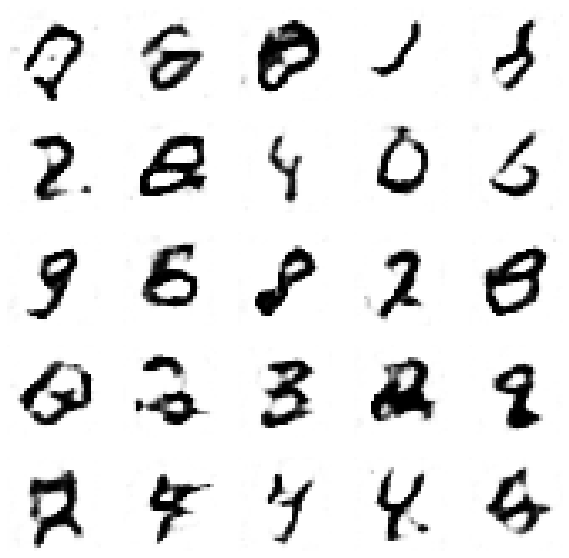

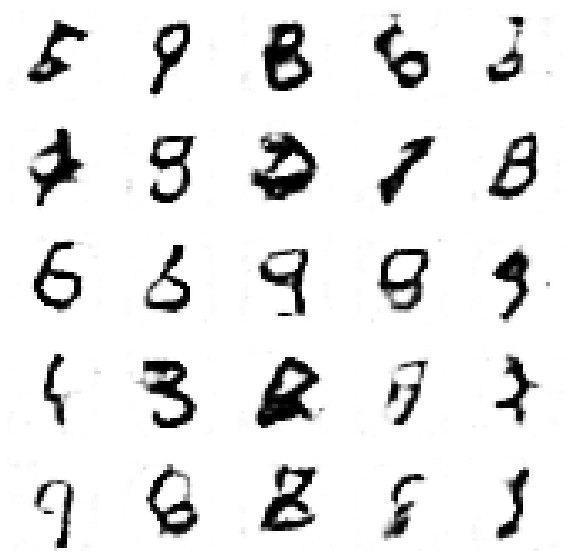

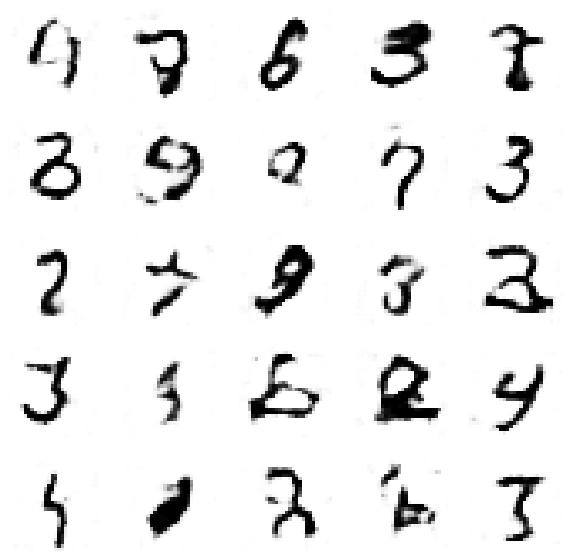

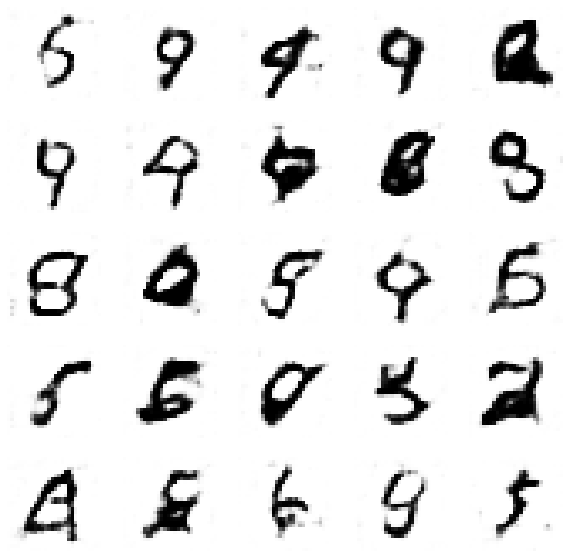

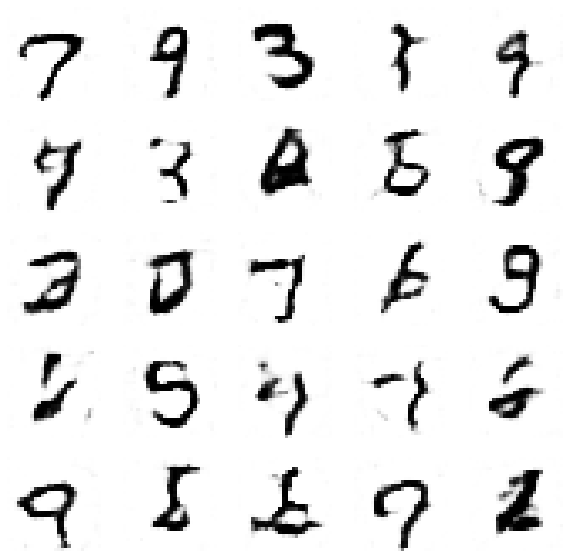

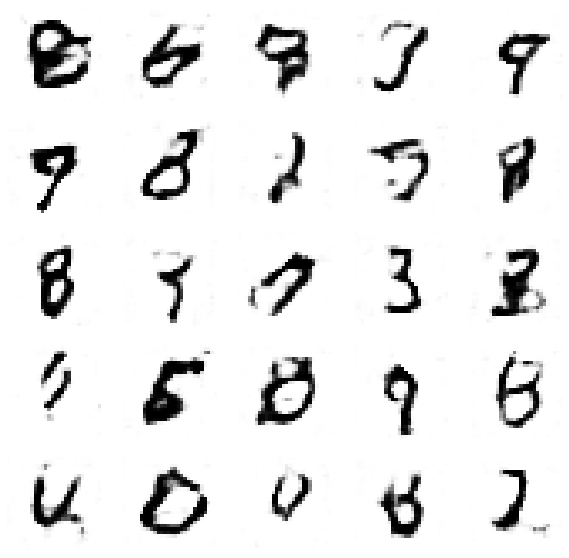

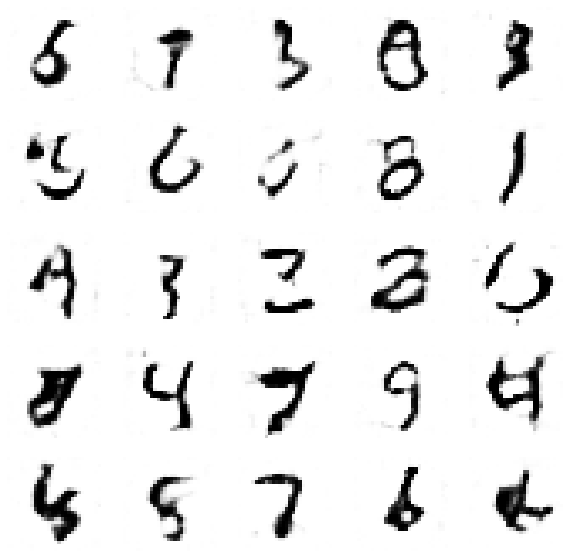

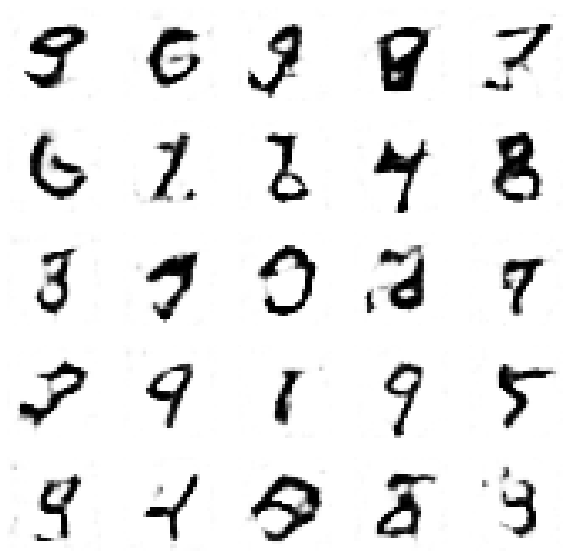

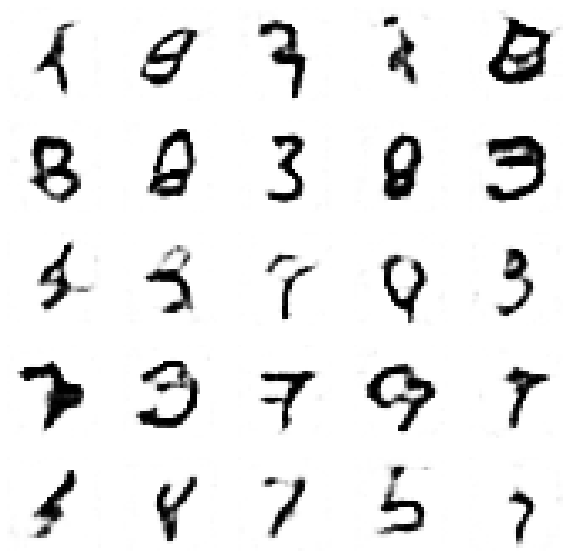

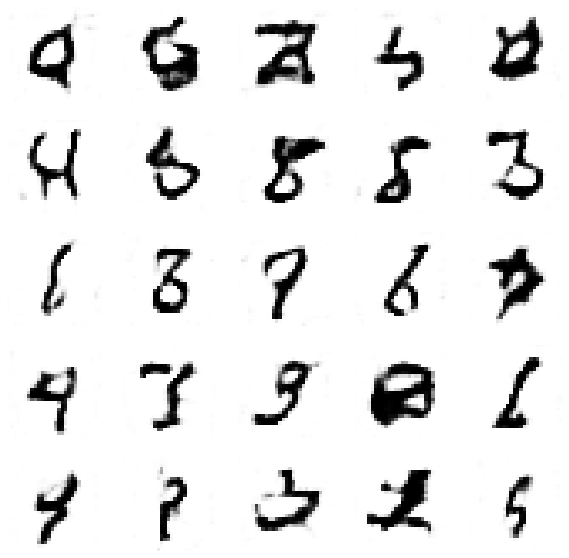

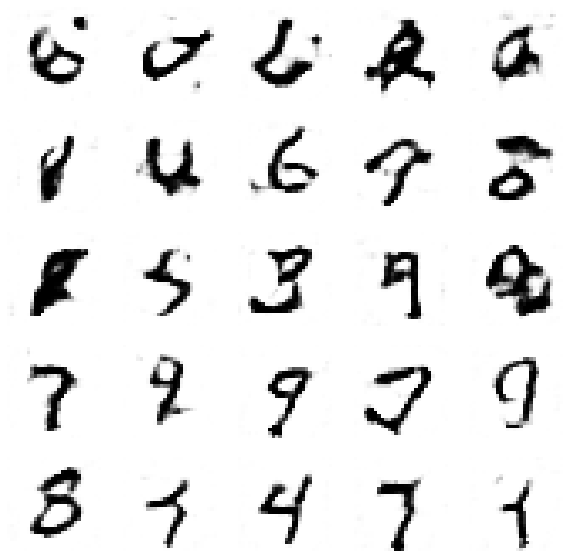

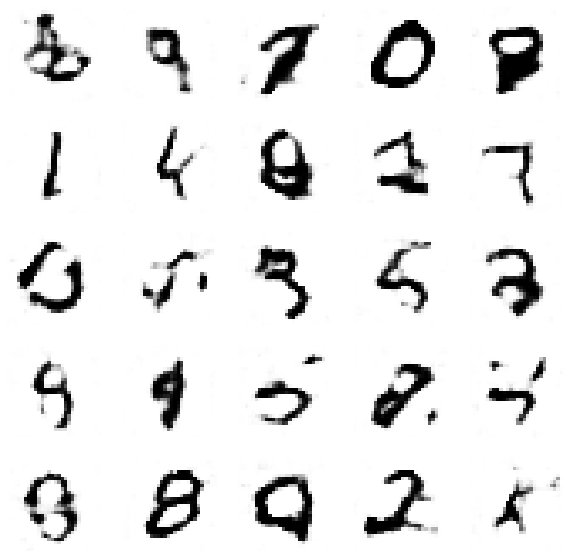

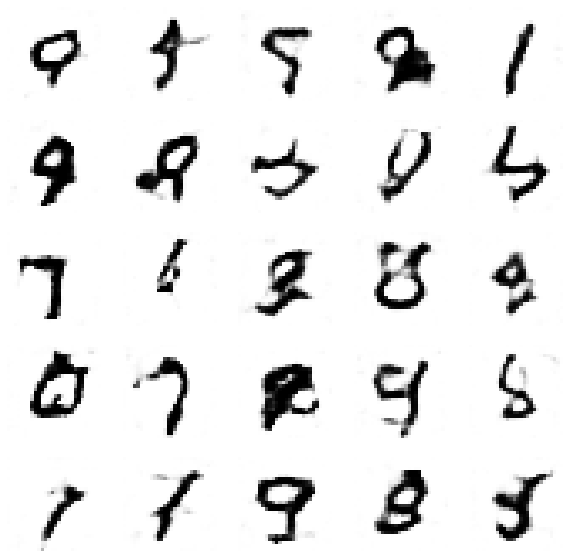

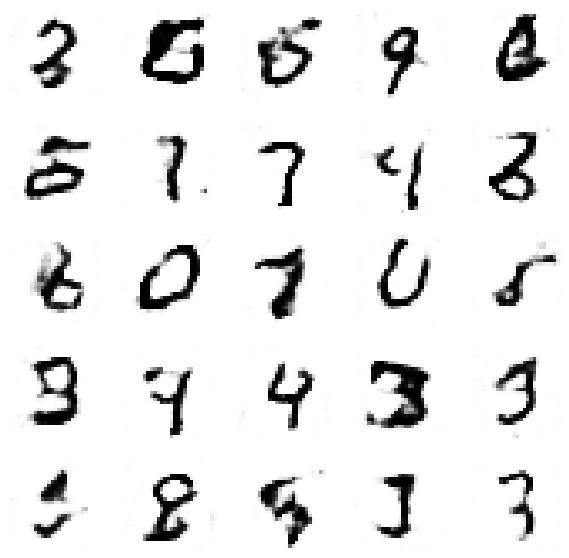

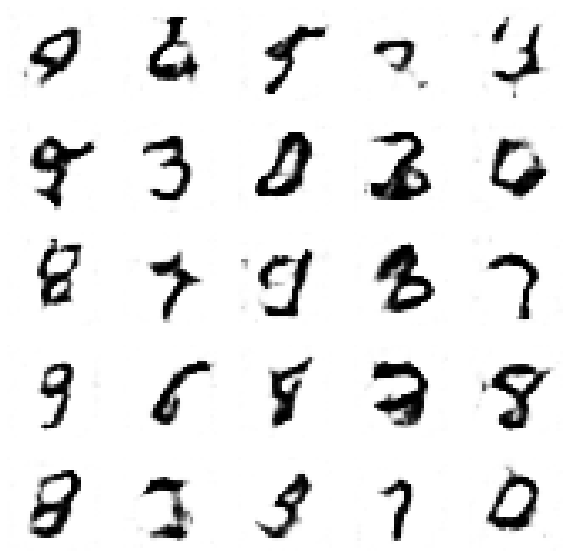

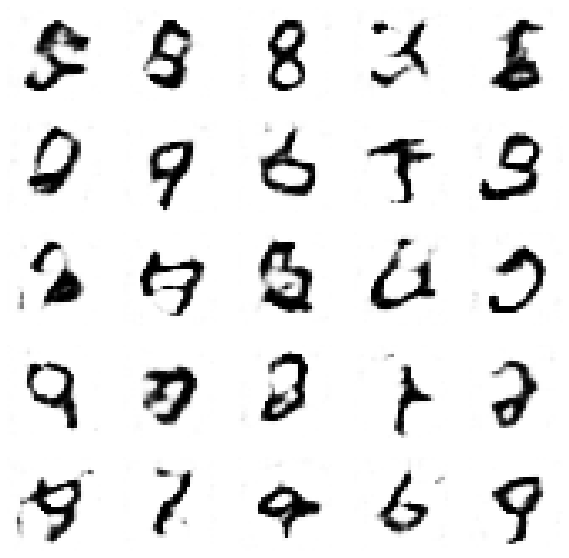

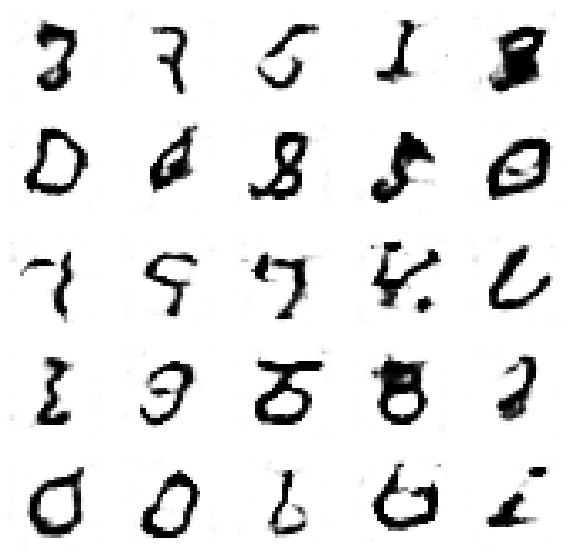

In [64]:
dlosses = []
glosses = []
count = 0
for epoch in range(totalepochs):
    epochdlosses = 0.0
    epochglosses = 0.0
    for step in range(numofbatch):
        discriminator.trainable = True
        idx = np.random.randint(0,60000, halfbatch)
        realimage = xtrain[idx]
        noise = np.random.normal(0,1, size=(halfbatch,noisedim))
        fakeimage = generator.predict(noise)
        realy = np.ones((halfbatch, 1))*0.9
        fakey = np.zeros((halfbatch, 1))
        dlossreal = discriminator.train_on_batch(realimage, realy)
        dlossfake = discriminator.train_on_batch(fakeimage, fakey)
        dloss = 0.5 * dlossreal + 0.5 * dlossfake
        epochdlosses += dloss
        discriminator.trainable = False
        noise = np.random.normal(0,1,size=(batchsize, noisedim))
        groundtruthy = np.ones((batchsize, 1))
        gloss = model.train_on_batch(noise, groundtruthy)
        epochglosses += gloss
        print(f"epoch{epoch + 1}, discriminator losses{epochdlosses/numofbatch}, generator losses{epochglosses/numofbatch}")
        dlosses.append(epochdlosses/numofbatch)
        glosses.append(epochglosses/numofbatch)
        if(epoch + 1) % 10 == 0:
            generator.save("generator.h5")
            displayimages()